# Setup of historical scenarios

Page with data: http://earthquake.usgs.gov/earthquakes/search/

The formula for estimating the slip, length and width given the magnitude alone:

$$ log L = 0.5M - 1.8 $$ 
$$ W = L/2 \text{ or } W = 0.5M - 2.1$$
$$ log D = 0.5 M -3.3$$

with $L$ and $W$ in km, and $D$ in m.

In [1]:
import numpy as np
def Mw2Mo(Mw):
    return np.power(10., 1.5*Mw+9.1)
def getLengthWidthSlip(Mw,mu=2.0e10):
    L = np.power(10., 0.5*Mw-1.80)*1000
    W = 0.5*L
    slip = Mw2Mo(Mw)/(mu*L*W)
    return L,W,slip

## Alaska

https://www.youtube.com/watch?v=Lac4Zs_CIdw



# Japan 2011

The easy parameters are:

* Epicenter: 38.297°N, 142.372°E
* Magnitude: 9.0
* Depth: 30 km
* 

In [2]:
japon2011 = {}

japon2011["cn"] = 38.297
japon2011["ce"] = 142.372
japon2011["Mw"] = 9.0
japon2011["depth"] = 30000.0
japon2011["U3"] = 0.0

LWslip = getLengthWidthSlip(japon2011["Mw"])
japon2011["L"] = LWslip[0]
japon2011["W"] = LWslip[1]
japon2011["slip"] = LWslip[2]


In [3]:
import requests
from StringIO import StringIO
r = requests.get("http://earthquake.usgs.gov/earthquakes/eqinthenews/2011/usc0001xgp/results/static_out")
data = np.genfromtxt(StringIO(r.text),skip_header=10)

* 0 = Lat
* 1 = Lon
* 2 = depth 
* 3 = slip
* 4 = rake
* 5 = strike 
* 6 = dip
* 7 = t_rup 
* 8 = t_rise mo

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline

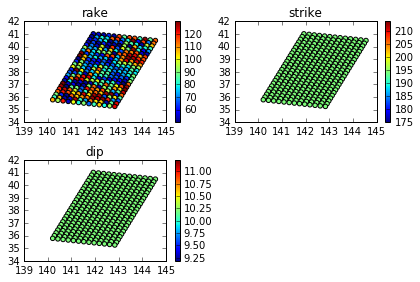

In [5]:
plt.subplot(221)
plt.scatter(data[:,1],data[:,0],c = data[:,4])
plt.title('rake')
plt.colorbar()
plt.subplot(222)
plt.scatter(data[:,1],data[:,0],c = data[:,5])
plt.title('strike')
plt.colorbar()
plt.subplot(223)
plt.scatter(data[:,1],data[:,0],c = data[:,6])
plt.title('dip')
plt.colorbar()

plt.tight_layout()

In [6]:
japon2011['rake'] = np.mean(data[:,4])
japon2011['strike'] = data[0,5]
japon2011['dip'] = data[0,6]

In [7]:
faults = {"japan2011": japon2011}
faults

{'japan2011': {'L': 501187.23362727248,
  'Mw': 9.0,
  'U3': 0.0,
  'W': 250593.61681363624,
  'ce': 142.372,
  'cn': 38.297,
  'depth': 30000.0,
  'dip': 10.210000000000001,
  'rake': 87.652631230769245,
  'slip': 15.848931924611172,
  'strike': 194.42999}}

# Valdivia 1960

According to the paper of Barrientos (1960)

In [8]:
valdivia1960 = {}
valdivia1960["ce"] = -75.0
valdivia1960["cn"] = -41.0
valdivia1960["L"] = 850000
valdivia1960["W"] = 130000
valdivia1960["slip"] = 17.0
valdivia1960["dip"] = 20.0
valdivia1960["U3"] = 0.0

For the strike "...to coincide with the local trend (N7°E) .."

In [9]:
valdivia1960["strike"] = 7.0

For the rake angle: "The rake angle of the event was fixed at
105"

In [10]:
valdivia1960["rake"] = 105.0

For the depth: "The depth of the upper
southern corner was fixed at 4 km"

In [11]:
valdivia1960["depth"] = 4e3+0.5*valdivia1960["W"]*np.sin(valdivia1960["dip"])

# Alaska 1964

According to http://earthquake.usgs.gov/earthquakes/eventpage/iscgem869809#origin
60.908°N 147.339°W–
9.3Mw
mu = 4e10

In [12]:
alaska1964 ={"Mw": 9.2, "cn": 60.908, "ce":-147.339} 

Estimate slip length and width

In [13]:
LWS = getLengthWidthSlip(alaska1964["Mw"],mu=4.0e10)
alaska1964["L"] = LWS[0]
alaska1964["W"] = LWS[1]
alaska1964["slip"] = LWS[2]
alaska1964["U3"] = 0.0

In [14]:
alaska1964["strike"]= 218.
alaska1964["dip"]= 8.0
alaska1964["rake"]= 90.0
alaska1964["depth"] = 25000.

In [15]:
alaska1964

{'L': 630957.34448019299,
 'Mw': 9.2,
 'U3': 0.0,
 'W': 315478.67224009649,
 'ce': -147.339,
 'cn': 60.908,
 'depth': 25000.0,
 'dip': 8.0,
 'rake': 90.0,
 'slip': 9.9763115748443738,
 'strike': 218.0}

# Biobio 2010

In [16]:
biobio2010 = {
    "L": 450000.0,
    "W": 150000.0,
    "depth": 30100.0,
    "slip": 6.06,
    "U3": 0.0,
    "strike": 18.0,
    "dip": 18.0,
    "rake": 112.0,
    "cn": -35.5,
    "ce": -73.03}

# Write everything down

In [17]:
faults = {"japan2011":japon2011, 
          "valdivia1960":valdivia1960, 
          "alaska1964":alaska1964, 
          "biobio2010": biobio2010}

In [18]:
import json
f = open('historicalData.json','w')
a = json.dumps(faults,indent=2)
f.write(a)
f.close()

In [19]:
!cat test.json

{
  "alaska1964": {
    "depth": 25000.0, 
    "slip": 9.9763115748443738, 
    "rake": 90.0, 
    "L": 630957.34448019299, 
    "ce": -147.339, 
    "Mw": 9.2, 
    "U3": 0.0, 
    "W": 315478.67224009649, 
    "strike": 218.0, 
    "dip": 8.0, 
    "cn": 60.908
  }, 
  "biobio2010": {
    "depth": 30100.0, 
    "ce": -73.03, 
    "slip": 6.06, 
    "W": 150000.0, 
    "strike": 18.0, 
    "rake": 112.0, 
    "dip": 18.0, 
    "L": 450000.0, 
    "U3": 0.0, 
    "cn": -35.5
  }, 
  "valdivia1960": {
    "slip": 17.0, 
    "rake": 105.0, 
    "L": 850000, 
    "ce": -75.0, 
    "depth": 63341.441297295802, 
    "U3": 0.0, 
    "W": 130000, 
    "strike": 7.0, 
    "dip": 20.0, 
    "cn": -41.0
  }, 
  "japan2011": {
    "cn": 38.297, 
    "slip": 15.848931924611172, 
    "rake": 87.652631230769245, 
    "Mw": 9.0, 
    "ce": 142.372, 
    "L": 501187.23362727248, 
    "depth": 30000.0, 
    "U3": 0.0, 
    "W": 250593.61681363624, 
    "strike": 194.42999, 
    "dip": 10.21000000000000

In [20]:
!cp historicalData.json ../../web/app/data/.

From the conference paper of 

# Sumatra 2004

http://ceeserver.cee.cornell.edu/pll-group/doc/2004_Sumatra_Earthquake_and%20Indian_Ocean_Tsunami.pdf